## Getting Magnetometer Data from the Server

Aberystwyth magnetometer data can be collected using the REST API of the [Magnetometer Data Server](https://github.com/Jammyjamjamman/Magnetometer_data_server). An example of retrieving geomagnetic data from Frongoch Farm, Hartland and Eskdalemuir, on the $06^{th}$ August, 2018 is provided. A [significant solar storm](https://www.spaceweatherlive.com/en/auroral-activity/top-50-geomagnetic-storms/year/2011) occured at this date and can be seen in the data at all observatories.

Load relevant libs:

In [1]:
import requests
import io
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

### Getting information about the sensors.

In [2]:
r = requests.get("http://localhost:5000/available_sensors")
# Check the request was received
if r.status_code == requests.codes.ok:
    sensors = r.json()
    print("Observatories information:")
    for sensor in sensors:
        print()
        for key in sensor:
            print(key+":", sensor[key])
        

Observatories information:

UK_grid_ref: SN6056882610
_id: frg_single_fgm3
address: B4572, Aberystwyth SY23 3DG, UK
coord_sys: F
elevation: 133
latitude: 52.423649
longitude: -4.0519305
name: Frongoch Farm
raw_dat_params: ['time', 'reading', 'temperature']

In Operation since: 1957
_id: HAD
coord_sys: HDZF
elevation: 95
latitude: 50.995
longitude: 355.516
name: Hartland
orientation: HDZF
website: http://geomag.bgs.ac.uk/operations/hartland.html

INTERMAGNET member since: 1991
In Operation since: 1908
_id: ESK
address: Eskdalemuir, Dumfries and Galloway, Scotland, United Kingdom
coord_sys: HDZF
elevation: 245
latitude: 55.314
longitude: 356.794
name: Eskdalemuir
orientation: HDZF
website: http://geomag.bgs.ac.uk/operations/eskdale.html


The magnetometer `_id` can be used to retrieve data for that observatory. Some examples are given below.

### Getting Frongoch Farm Data:

,F,igrf
time,,
2011-08-05 01:00:00,-23.173876,48817.675781
2011-08-05 01:01:00,-23.609188,48817.675781
2011-08-05 01:02:00,-24.689025,48817.675781
2011-08-05 01:03:00,-23.849874,48817.675781
2011-08-05 01:04:00,-24.050981,48817.675781


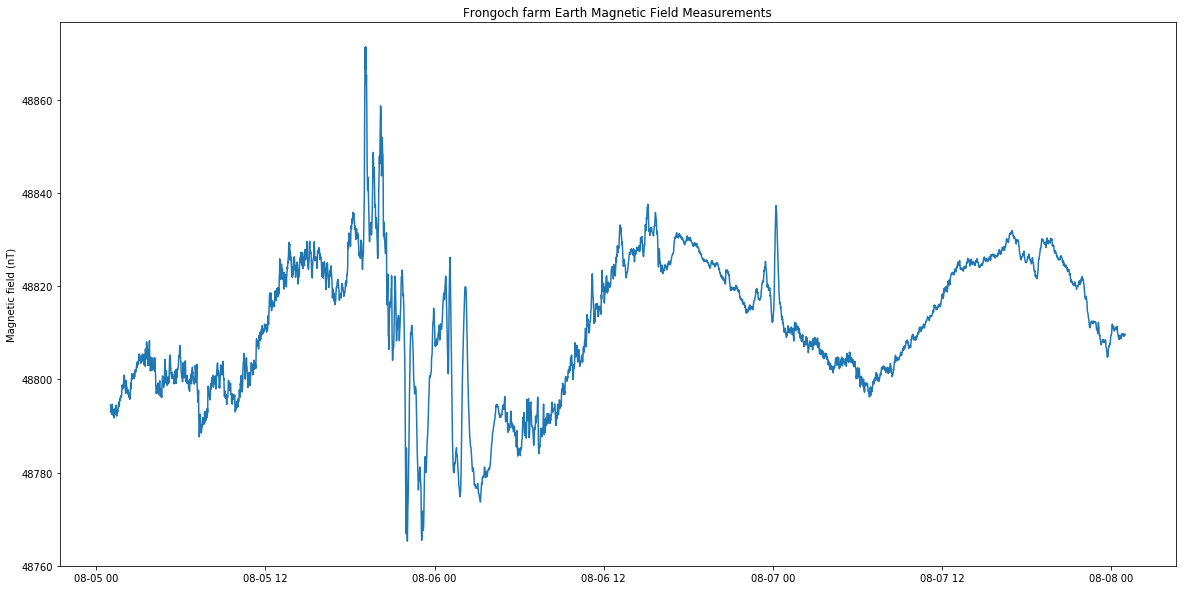

In [5]:
# The url of the magnetometer server
dat_url = 'http://localhost:5000/mag_dat'

# Set what data we want.
# sensor_id: the id of the sensor we want "frg_single_fgm3".
# starttime: the starttime of the sensor data we want.
# endtime: the endtime of the sensor data we want.
#
# Note: the times need to be in POSIX time.
# This can be obtained by converting a datestring e.g. "2016-03-20 00:00:00"
# into a pandas timestamp, then using the timestamp() method to get the time
# as a POSIX time number.
payload = {"sensor_id": "frg_single_fgm3",
           "starttime": int(pd.Timestamp("2011-08-05 00:00:00").timestamp()),
           "endtime": int(pd.Timestamp("2011-08-07 23:59:00").timestamp())
         }

# Request the data from the web.
r = requests.get(dat_url, params=payload)
# Check the request was received.
if r.status_code == requests.codes.ok:
    # read the response into a pandas dataframe.
    # Note: pd.read_csv() expects a file or a buffer, but the response
    # is text. Therefore, read string into a stringIO buffer.
    frg_dat = pd.read_csv(io.StringIO(r.text), parse_dates=True, index_col="time")
    # View data.
    display(frg_dat.head())
    # Plot the data.
    plt.figure(figsize=(20,10))
    # remove huge spikes in the magnetometer data before plotting.
    frg_dat["tot_field"] = frg_dat["F"] + frg_dat["igrf"]
    frg_dat_valid = frg_dat.loc[(frg_dat["F"] > -100) & (frg_dat["F"] < 100)]
    plt.title("Frongoch farm Earth Magnetic Field Measurements")
    plt.ylabel("Magnetic field (nT)")
    plt.plot(frg_dat_valid.index, frg_dat_valid["tot_field"])
else:
    print("Failed to get data!")

## Getting Hartland Data:

,H,D,Z,F
time,,,,
2011-08-05 01:00:00,19703.287109,-170.707489,44268.0,48455.0
2011-08-05 01:01:00,19703.287109,-170.707489,44268.0,48455.0
2011-08-05 01:02:00,19702.289062,-170.716141,44268.0,48455.0
2011-08-05 01:03:00,19702.289062,-170.716141,44268.0,48454.0
2011-08-05 01:04:00,19702.238281,-170.541870,44268.0,48455.0


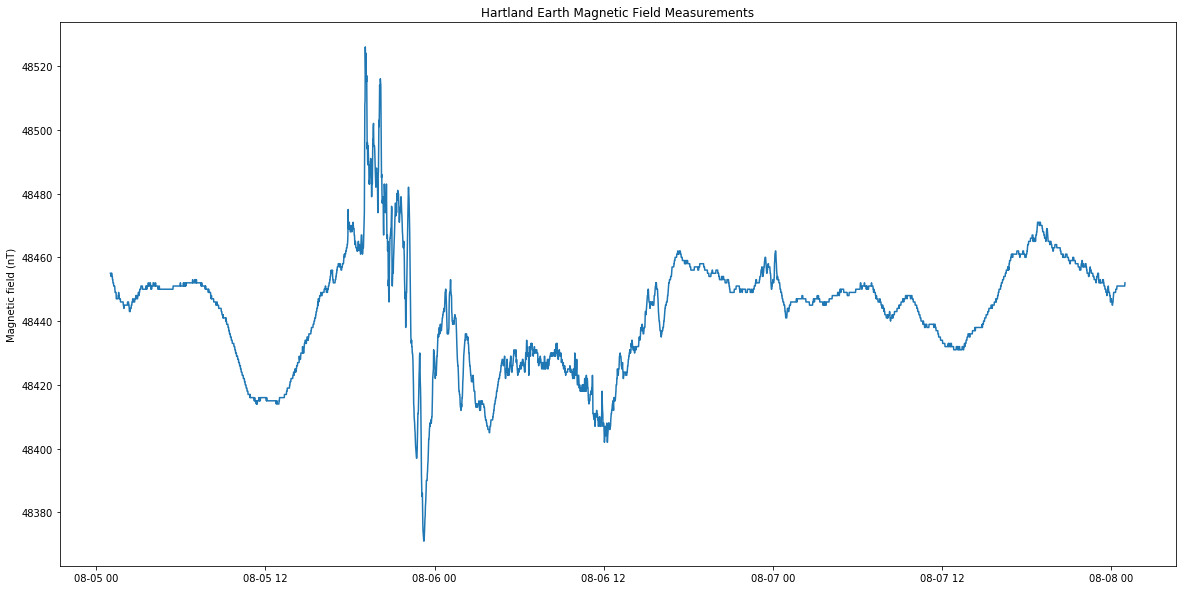

In [6]:
# This time, set the sensor_id to HAD to get hartland data.
# We will keep the times the same, so just change the sensor_id value.
payload["sensor_id"] = "HAD"

# Request the data from the web.
r = requests.get(dat_url, params=payload)
# Check the request was received.
if r.status_code == requests.codes.ok:
    # read the response into a pandas dataframe.
    # Note: pd.read_csv() expects a file or a buffer, but the response
    # is text. Therefore, read string into a stringIO buffer.
    HAD_dat = pd.read_csv(io.StringIO(r.text), parse_dates=True, index_col="time")
    # view data.
    display(HAD_dat.head())
    # Plot the data.
    plt.figure(figsize=(20,10))
    plt.title("Hartland Earth Magnetic Field Measurements")
    plt.ylabel("Magnetic field (nT)")
    plt.plot(HAD_dat.index, HAD_dat["F"])
else:
    print("Failed to get data!")

## Getting Eskdalemuir Data:

,H,D,Z,F
time,,,,
2011-08-05 01:00:00,17518.656250,-193.195419,46371.0,49570.0
2011-08-05 01:01:00,17517.658203,-193.206436,46371.0,49570.0
2011-08-05 01:02:00,17516.660156,-193.217468,46371.0,49569.0
2011-08-05 01:03:00,17516.603516,-193.021515,46371.0,49569.0
2011-08-05 01:04:00,17515.548828,-192.836563,46371.0,49569.0


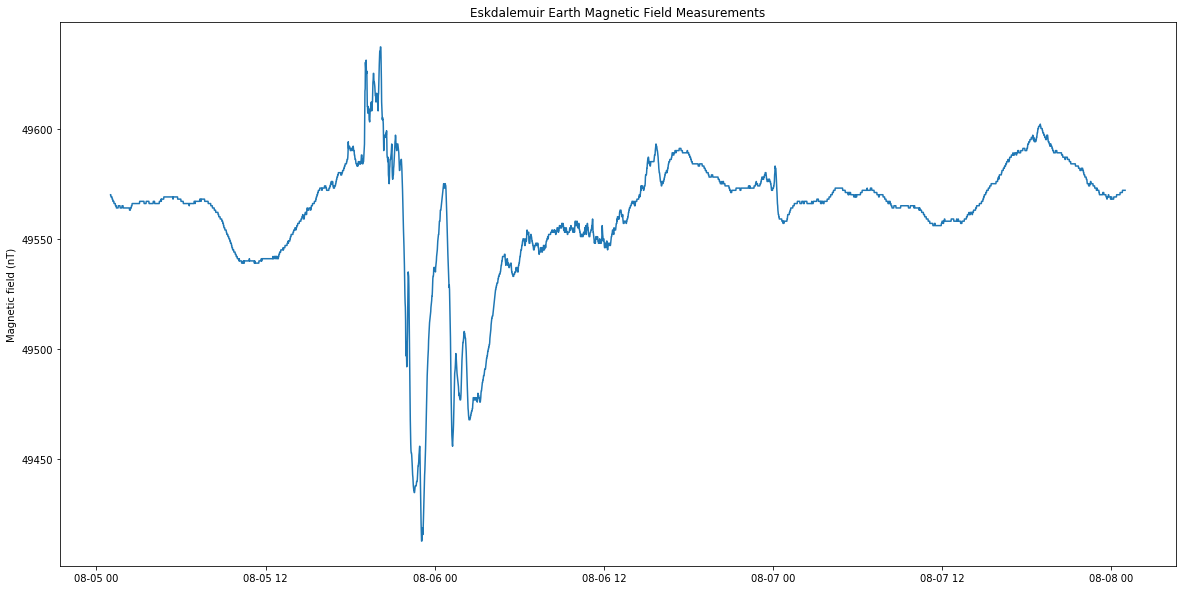

In [7]:
# Same way as Hartland data is obtained.
payload["sensor_id"] = "ESK"

# Request the data from the web.
r = requests.get(dat_url, params=payload)
# Check the request was received.
if r.status_code == requests.codes.ok:
    # read the response into a pandas dataframe.
    # Note: pd.read_csv() expects a file or a buffer, but the response
    # is text. Therefore, read string into a stringIO buffer.
    ESK_dat = pd.read_csv(io.StringIO(r.text), parse_dates=True, index_col="time")
    # view data.
    display(ESK_dat.head())
    # Plot the data.
    plt.figure(figsize=(20,10))
    plt.title("Eskdalemuir Earth Magnetic Field Measurements")
    plt.ylabel("Magnetic field (nT)")
    plt.plot(ESK_dat.index, ESK_dat["F"])
else:
    print("Failed to get data!")

Magnetometer data has been retrieved, and it is stored in the pandas dataframes `frg_dat`, `HAD_dat` and `ESK_dat`. More processing and analysis of this data can be done using various python libraries e.g. pandas, numpy and scipy.

### Extra data analysis/ processing examples:

In [8]:
# Getting daily averages
print("Daily averages")
display(frg_dat.resample("1d").mean())

# Downsample + smooth to 1 hour readings.
frg_1h = frg_dat.resample("1h").mean()
# Getting daily 1 hour average maximums.
print("Daily hour max:")
display(frg_1h.resample("1d").max())

# Getting daily 1 hour average minimums.
print("Daily hour min:")
display(frg_1h.resample("1d").min())

# Getting daily differences.
print("Daily variation:")
display(frg_1h.resample("1d").max() - frg_1h.resample("1d").min())

# Save the data locally:
frg_dat.to_csv("my_frongoch_dat.csv")

Daily averages


,F,igrf,tot_field
time,,,
2011-08-05,-7.819896,48817.675781,48809.855885
2011-08-06,-6.269229,48817.726562,48811.457334
2011-08-07,-2.763101,48817.781250,48815.018149
2011-08-08,-7.771996,48817.832031,48810.060035


Daily hour max:


,F,igrf,tot_field
time,,,
2011-08-05,23.799968,48817.675781,48841.475750
2011-08-06,15.180831,48817.726562,48832.907394
2011-08-07,11.595753,48817.781250,48829.377003
2011-08-08,-7.771996,48817.832031,48810.060035


Daily hour min:


,F,igrf,tot_field
time,,,
2011-08-05,-28.192747,48817.675781,48789.483035
2011-08-06,-39.168164,48817.726562,48778.558399
2011-08-07,-18.731060,48817.781250,48799.050190
2011-08-08,-7.771996,48817.832031,48810.060035


Daily variation:


,F,igrf,tot_field
time,,,
2011-08-05,51.992715,0.0,51.992715
2011-08-06,54.348995,0.0,54.348995
2011-08-07,30.326813,0.0,30.326813
2011-08-08,0.000000,0.0,0.000000
